In [60]:
# predecting the credit card balance using regression

# link 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
col_list = ['#005f9a', '#00CDCD', '#f1bdbf']
sns.set_palette(col_list)

In [62]:
sns.set_palette("Reds")

In [63]:
sns.set_palette("Set1", 8, .75)

In [64]:
credit_df=pd.read_csv("E:\python\data for datascient\datasets_309_669_Credit.csv")

In [65]:
credit_df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [66]:
credit_df=pd.read_csv("E:\python\data for datascient\datasets_309_669_Credit.csv" , index_col=0)
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [67]:
credit_df.Gender=credit_df.Gender.astype('category')
credit_df.Student = credit_df.Student.astype('category')
credit_df.Married = credit_df.Married.astype('category')
credit_df.Ethnicity = credit_df.Ethnicity.astype('category')

In [68]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


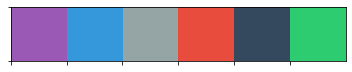

In [69]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

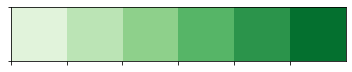

In [70]:
sns.palplot(sns.color_palette("Greens"))

In [72]:
credit_df.info()
# we changed all other vlaue in a categorical format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null category
Student      400 non-null category
Married      400 non-null category
Ethnicity    400 non-null category
Balance      400 non-null int64
dtypes: category(4), float64(1), int64(6)
memory usage: 26.9 KB


In [73]:
credit_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [74]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [75]:
credit_df.describe(include='category')

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


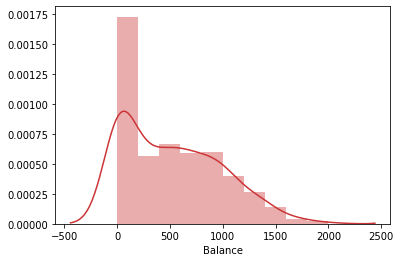

In [76]:
sns.distplot(credit_df.Balance)

In [78]:
# active_credit_df = credit_df.loc[credit_df.Balance>0,].copy()
# active_credit_df.Balance.describe()                                 

active_credit_df = credit_df.loc[credit_df.Balance>0,].copy()
active_credit_df.Balance.describe()

count     310.000000
mean      670.987097
std       413.904019
min         5.000000
25%       338.000000
50%       637.500000
75%       960.750000
max      1999.000000
Name: Balance, dtype: float64

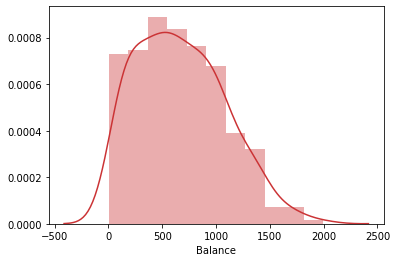

In [79]:
sns.distplot(active_credit_df.Balance)

In [92]:
credit_df['Active']=np.where(credit_df.Balance>0 , 'yes', 'no')
credit_df.Active.describe()

count     400
unique      2
top       yes
freq      310
Name: Active, dtype: object

([<matplotlib.axis.YTick at 0x1b682727e48>,
 <a list of 7 Text yticklabel objects>)

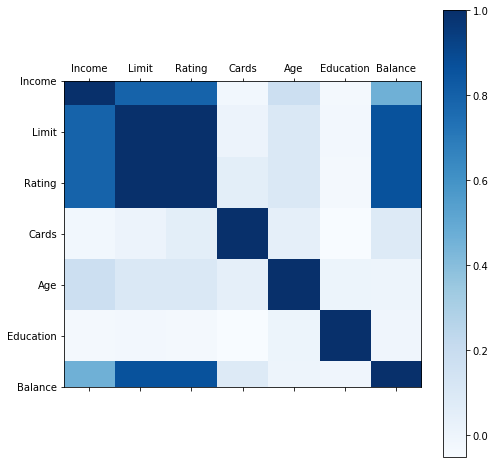

In [118]:
numeric_credit_df = credit_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,8))
plt.matshow(credit_df.corr(), cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(numeric_credit_df.columns))]
plt.xticks(tick_marks , numeric_credit_df.columns)
plt.yticks(tick_marks , numeric_credit_df.columns)

In [132]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(credit_df.Balance, credit_df.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))
r2, p2 = pearsonr(credit_df.Balance, credit_df.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))
r3, p3 = pearsonr(credit_df.Balance, credit_df.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))
r4, p4 = pearsonr(credit_df.Limit, credit_df.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))
r5, p5 = pearsonr(credit_df.Limit, credit_df.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))
r6, p6 = pearsonr(credit_df.Rating, credit_df.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

Correlation coefficient Balance-Limit: 0.8616972670153954
 p-value: 2.530580711712837e-119

Correlation coefficient Balance-Rating: 0.8636251606214953
 p-value: 1.8988990970393693e-120

Correlation coefficient Balance-Income: 0.4636564570157574
 p-value: 1.030885802589071e-22

Correlation coefficient Limit-Rating: 0.9968797370016828
 p-value: 0.0

Correlation coefficient Limit-Income: 0.7920883413369415
 p-value: 2.3917894422844805e-87

Correlation coefficient Rating-Income: 0.7913776251121218
 p-value: 4.362691443088444e-87



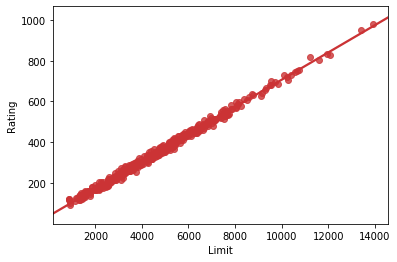

In [140]:
sns.regplot(x="Limit" , y="Rating" ,data=credit_df)

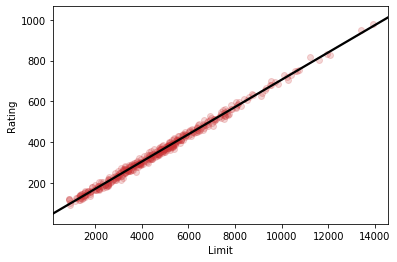

In [147]:
sns.regplot(x="Limit" , y="Rating" ,data=credit_df , scatter_kws={'alpha':0.2} ,line_kws={'color':'black'})

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

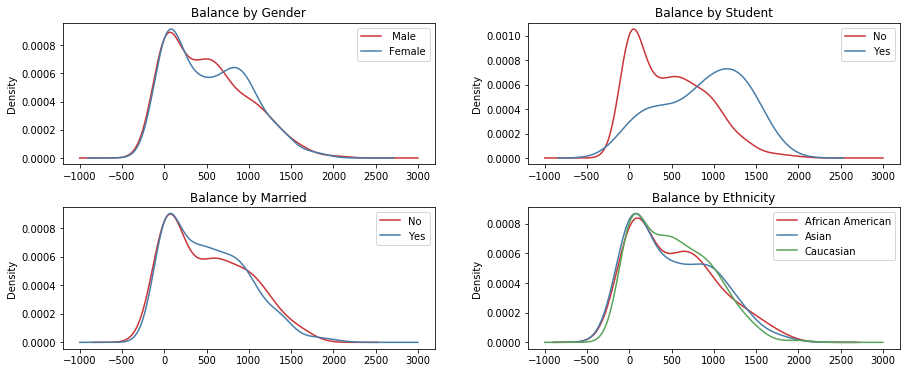

In [181]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

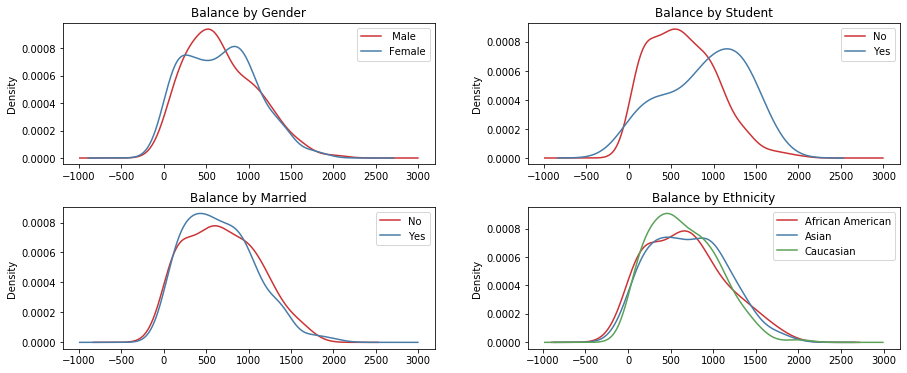

In [182]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
active_credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
active_credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
active_credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
active_credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')

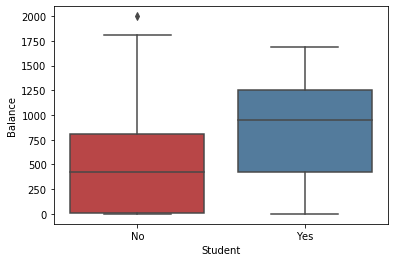

In [186]:
sns.boxplot(x='Student', y='Balance', data = credit_df)

In [193]:
mod0 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = credit_df).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          4.46e-248
Time:                        04:41:29   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
active_mod0 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = active_credit_df).fit()
active_mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.38e-264
Time:                        23:55:32   Log-Likelihood:                -1659.9
No. Observations:                 310   AIC:                             3342.
Df Residuals:                     299   BIC:                             3383.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -791.3689     21.193    -37.340      0.000    -833.076    -749.662
Gender[T.Female]          -2.6107      5.961     -0.438      0.662     -14.341       9.119
Student[T.Yes]           478.1566      9.239     51.752      0.000     459.974     496.339
Married[T.Yes]           -14.0808      6.221     -2.263      0.024     -26.324      -1.837
Ethnicity[T.Asian]         4.1786      8.590      0.486      0.627     -12.726      21.083
Ethnicity[T.Caucasian]    -1.8990      7.284     -0.261      0.794     -16.233      12.435
Income                    -9.7126      0.145    -66.859      0.000      -9.999      -9.427
Rating                     4.7767      0.040    120.602      0.000       4.699       4.855
Cards                      3.0923      2.102      1.471      0.142      -1.045       7.229
Age                       -1.1431      0.176     -6.481      0.000      -1.490      -0.796
Education                  1.2817      0.938      1.366      0.173      -0.564       3.128
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.433
Skew:                          -0.139   Prob(JB):                        0.296
Kurtosis:                       2.666   Cond. No.                     3.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
mod1=smf.ols('Balance ~ Income + Rating + Student +Age ' , data=credit_df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          4.17e-256
Time:                        00:47:29   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.3047     21.461    -25.503      0.000    -589.496    -505.113
Student[T.Yes]   417.5056     17.172     24.314      0.000     383.746     451.265
Income            -7.7977      0.242    -32.198      0.000      -8.274      -7.322
Rating             3.9807      0.055     72.927      0.000       3.873       4.088
Age               -0.6242      0.304     -2.053      0.041      -1.222      -0.026
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.000
Skew:                           0.494   Prob(JB):                     0.000203
Kurtosis:                       2.793   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Student
No     AxesSubplot(0.555556,0.125;0.344444x0.18875)
Yes    AxesSubplot(0.555556,0.125;0.344444x0.18875)
Name: Age, dtype: object

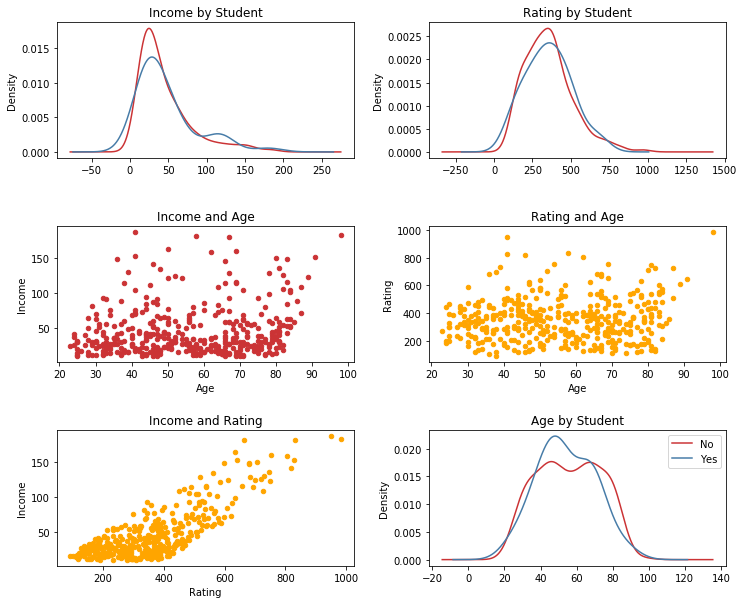

In [209]:
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.25)
credit_df.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], title='Income by Student')
# credit_df.plot(kind='kde', x='Student' , y='Income' , ax=axes[0][0], title='Income by Student')
credit_df.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1], title='Rating by Student')
credit_df.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][0], title='Income and Age')
credit_df.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[1][1], color='orange', title='Rating and Age')
credit_df.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating')
credit_df.groupby('Student').Age.plot(kind='kde', ax=axes[2][1], legend=True, title='Age by Student')

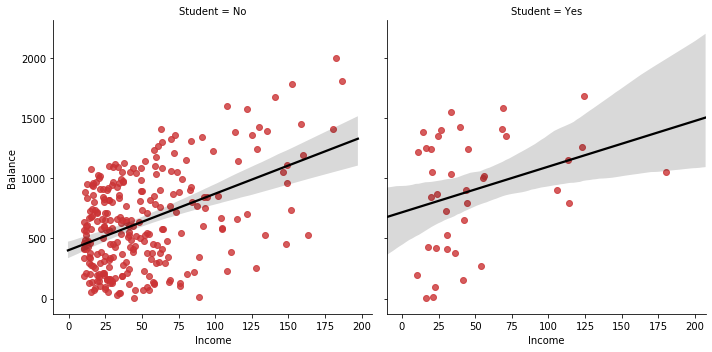

In [212]:
sns.lmplot(x="Income"  , y ="Balance" , data=active_credit_df , line_kws={'color':'black'} ,col="Student")

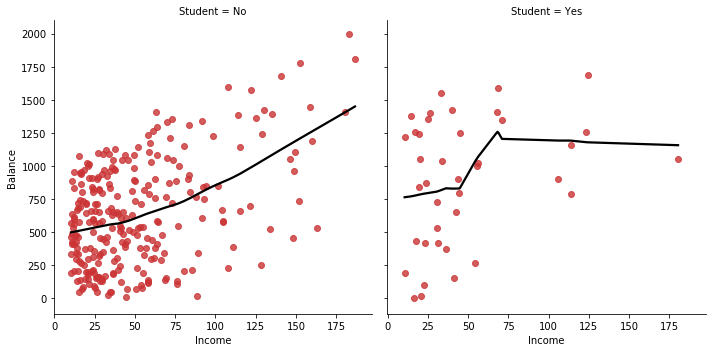

In [217]:
sns.lmplot(x="Income"  , y ="Balance" , data=active_credit_df ,lowess=True, line_kws={'color':'black'} ,col="Student")

In [218]:
mod2 = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Rating', data = credit_df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1524.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          3.68e-255
Time:                        01:23:05   Log-Likelihood:                -2416.9
No. Observations:                 400   AIC:                             4846.
Df Residuals:                     394   BIC:                             4870.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -527.6722     23.950    -22.032      0.000    -574.757    -480.587
Student[T.Yes]   416.9706     17.124     24.350      0.000     383.305     450.636
Income            -8.6268      0.514    -16.768      0.000      -9.638      -7.615
I(Income ** 2)     0.0055      0.003      1.825      0.069      -0.000       0.011
Age               -0.6161      0.303     -2.032      0.043      -1.212      -0.020
Rating             3.9790      0.054     73.098      0.000       3.872       4.086
==============================================================================
Omnibus:                       14.185   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.920
Skew:                           0.456   Prob(JB):                     0.000576
Kurtosis:                       2.748   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

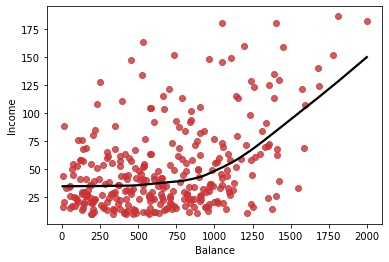

In [223]:
# ?this is my code

sns.regplot('Balance', 'Income',
           data = active_credit_df,
            lowess=True,
           
           line_kws={'color':'black'})

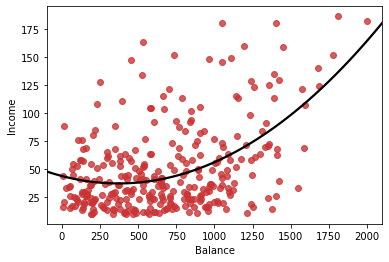

In [227]:
# this is original
sns.regplot('Balance', 'Income',
           data = active_credit_df,
           ci=None,
           order=2,
           line_kws={'color':'black'})

In [228]:
mod3 = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Income*Rating', data = credit_df).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1458.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          5.13e-265
Time:                        02:28:06   Log-Likelihood:                -2390.0
No. Observations:                 400   AIC:                             4794.
Df Residuals:                     393   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -429.1239     25.969    -16.524      0.000    -480.180    -378.068
Student[T.Yes]   425.7135     16.073     26.487      0.000     394.114     457.313
Income            -9.0837      0.485    -18.712      0.000     -10.038      -8.129
I(Income ** 2)    -0.0329      0.006     -5.638      0.000      -0.044      -0.021
Age               -0.6821      0.284     -2.402      0.017      -1.240      -0.124
Rating             3.4940      0.082     42.515      0.000       3.332       3.656
Income:Rating      0.0110      0.001      7.521      0.000       0.008       0.014
==============================================================================
Omnibus:                        7.324   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.374
Skew:                           0.237   Prob(JB):                       0.0413
Kurtosis:                       2.604   Cond. No.                     1.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
mod4 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Education*Income', data = credit_df).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          5.89e-253
Time:                        02:28:24   Log-Likelihood:                -2414.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     392   BIC:                             4877.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -455.5497     44.548    -10.226      0.000    -543.133    -367.966
Student[T.Yes]     416.8402     17.116     24.354      0.000     383.189     450.491
Income              -9.9373      0.807    -12.308      0.000     -11.525      -8.350
I(Income ** 2)       0.0060      0.003      1.977      0.049    3.17e-05       0.012
Rating               3.9711      0.054     73.019      0.000       3.864       4.078
Age                 -0.6240      0.302     -2.064      0.040      -1.218      -0.030
Education           -5.0695      2.673     -1.897      0.059     -10.324       0.185
Education:Income     0.0943      0.045      2.091      0.037       0.006       0.183
==============================================================================
Omnibus:                       13.655   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.400
Skew:                           0.450   Prob(JB):                     0.000747
Kurtosis:                       2.771   Cond. No.                     5.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
mod5 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Married*Age', data = credit_df).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1101.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          2.35e-253
Time:                        02:28:50   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4843.
Df Residuals:                     392   BIC:                             4875.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -561.6504     32.973    -17.033      0.000    -626.477    -496.823
Student[T.Yes]       417.3806     17.121     24.378      0.000     383.720     451.041
Married[T.Yes]        58.2726     35.992      1.619      0.106     -12.489     129.035
Income                -8.6631      0.512    -16.924      0.000      -9.670      -7.657
I(Income ** 2)         0.0059      0.003      1.949      0.052   -5.12e-05       0.012
Rating                 3.9786      0.054     73.496      0.000       3.872       4.085
Age                    0.1420      0.481      0.295      0.768      -0.804       1.088
Married[T.Yes]:Age    -1.2944      0.611     -2.118      0.035      -2.496      -0.093
==============================================================================
Omnibus:                       12.889   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.569
Skew:                           0.438   Prob(JB):                      0.00113
Kurtosis:                       2.786   Cond. No.                     5.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

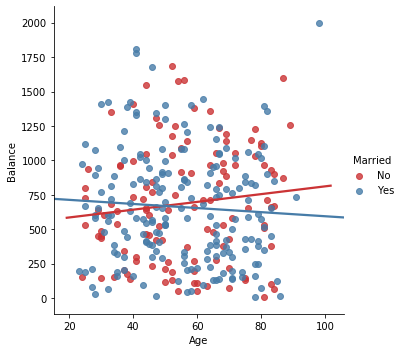

In [231]:
sns.lmplot(x="Age", 
           y="Balance", 
           hue="Married", 
           ci=None,
           data=active_credit_df);

In [232]:
mod6 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Gender*Cards', data = credit_df).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     961.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          7.75e-252
Time:                        02:29:16   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     391   BIC:                             4881.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -505.5063     29.280    -17.264      0.000    -563.073    -447.939
Student[T.Yes]           414.7916     17.165     24.165      0.000     381.045     448.538
Gender[T.Female]         -56.9505     24.573     -2.318      0.021    -105.262      -8.639
Income                    -8.6253      0.514    -16.766      0.000      -9.637      -7.614
I(Income ** 2)             0.0058      0.003      1.932      0.054      -0.000       0.012
Rating                     3.9674      0.055     72.561      0.000       3.860       4.075
Age                       -0.6826      0.303     -2.250      0.025      -1.279      -0.086
Cards                     -3.2603      5.083     -0.641      0.522     -13.254       6.734
Gender[T.Female]:Cards    15.7543      7.584      2.077      0.038       0.843      30.666
==============================================================================
Omnibus:                       13.489   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.150
Skew:                           0.444   Prob(JB):                     0.000846
Kurtosis:                       2.755   Cond. No.                     4.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

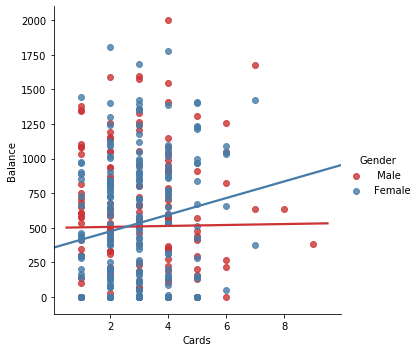

In [233]:
sns.lmplot(x="Cards", 
           y="Balance", 
           hue="Gender", 
           ci=None,
           data = credit_df);

In [235]:
active_mod7 = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Income*Rating', 
                      data = active_credit_df).fit()
active_mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3170.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          4.43e-270
Time:                        03:11:19   Log-Likelihood:                -1663.2
No. Observations:                 310   AIC:                             3340.
Df Residuals:                     303   BIC:                             3367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -780.4994     20.847    -37.439      0.000    -821.523    -739.475
Student[T.Yes]   482.1976      9.149     52.705      0.000     464.194     500.201
Income            -9.4049      0.290    -32.466      0.000      -9.975      -8.835
I(Income ** 2)    -0.0045      0.003     -1.333      0.184      -0.011       0.002
Rating             4.7559      0.066     72.197      0.000       4.626       4.886
Age               -1.1266      0.177     -6.374      0.000      -1.474      -0.779
Income:Rating      0.0006      0.001      0.658      0.511      -0.001       0.002
==============================================================================
Omnibus:                        2.411   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.335
Skew:                          -0.152   Prob(JB):                        0.311
Kurtosis:                       2.703   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
active_mod8 = smf.ols('Balance ~ Limit + Rating + Income + Age + Student + Cards', data = active_credit_df).fit()
active_mod8.summary()

# this is  the best mmodel as it give 99% acuracy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.031e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:12:16   Log-Likelihood:                -1164.6
No. Observations:                 310   AIC:                             2343.
Df Residuals:                     303   BIC:                             2369.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -698.5009      3.294   -212.053      0.000    -704.983    -692.019
Student[T.Yes]   501.0420      1.843    271.823      0.000     497.415     504.669
Limit              0.3365      0.004     85.333      0.000       0.329       0.344
Rating            -0.1501      0.058     -2.574      0.011      -0.265      -0.035
Income            -9.9930      0.029   -340.893      0.000     -10.051      -9.935
Age               -1.0000      0.035    -28.260      0.000      -1.070      -0.930
Cards             25.5015      0.497     51.278      0.000      24.523      26.480
==============================================================================
Omnibus:                        3.568   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.625
Skew:                          -0.258   Prob(JB):                        0.163
Kurtosis:                       2.882   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

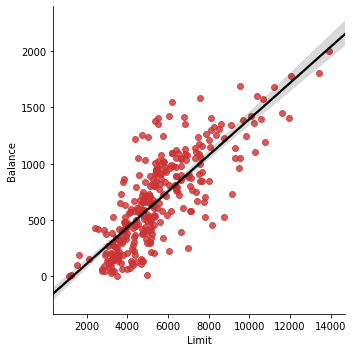

In [237]:
sns.lmplot('Limit' , 'Balance' , data=active_credit_df , line_kws={'color':'black'})

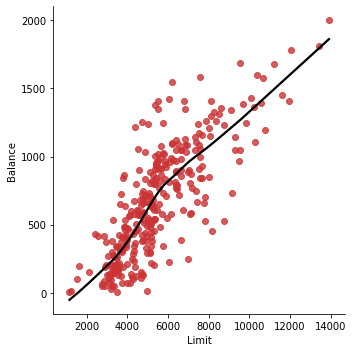

In [238]:
sns.lmplot('Limit' , 'Balance' , data=active_credit_df ,lowess=True, line_kws={'color':'black'})

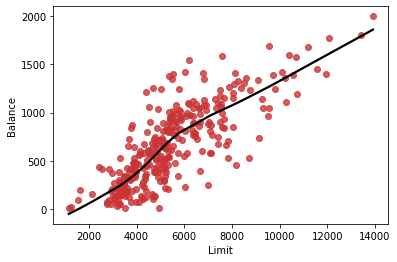

In [242]:
sns.regplot('Limit' , 'Balance' , data=active_credit_df ,lowess=True, line_kws={'color':'black'})
# this is original

In [243]:
mod9 = smf.ols('Balance ~ Rating', data = credit_df).fit()
mod9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          1.90e-120
Time:                        03:20:15   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

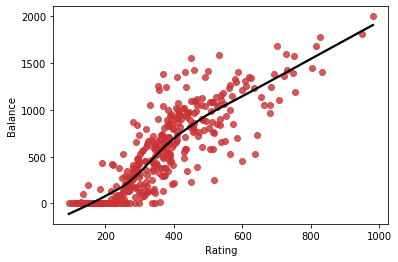

In [245]:
sns.regplot('Rating', 'Balance' , data=credit_df , lowess=True , line_kws={'color':'black'})

In [247]:
log_mod = smf.glm('Active ~ Limit + Rating + Income + Age + Cards + Education', 
                   data = credit_df,
                   family=sm.families.Binomial()).fit()
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                       
=========================================================================================
Dep. Variable:     ['Active[no]', 'Active[yes]']   No. Observations:                  400
Model:                                       GLM   Df Residuals:                      393
Model Family:                           Binomial   Df Model:                            6
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -53.379
Date:                           Tue, 02 Jun 2020   Deviance:                       106.76
Time:                                   03:57:35   Pearson chi2:                     464.
No. Iterations:                                9                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3924      2.040      4.114      0.000       4.394      12.390
Limit         -0.0024      0.002     -1.368      0.171      -0.006       0.001
Rating        -0.0210      0.026     -0.792      0.429      -0.073       0.031
Income         0.1114      0.021      5.291      0.000       0.070       0.153
Age           -0.0021      0.015     -0.143      0.886      -0.031       0.027
Cards         -0.1709      0.256     -0.668      0.504      -0.673       0.331
Education      0.0444      0.088      0.503      0.615      -0.128       0.217
==============================================================================
"""